In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/drive/MyDrive/assignments/insurance.csv')
df.head()


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.count()


,0
age,45211
job,45211
marital,45211
education_qual,45211
call_type,45211
day,45211
mon,45211
dur,45211
num_calls,45211
prev_outcome,45211


In [ ]:
for col in df.columns:
  print(f'Column: {col}')
  print(df[col].unique())

Column: age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Column: marital
['married' 'single' 'divorced']
Column: education_qual
['tertiary' 'secondary' 'unknown' 'primary']
Column: call_type
['unknown' 'cellular' 'telephone']
Column: day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Column: mon
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Column: dur
[ 261  151   76 ... 1298 1246 1556]
Column: num_calls
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
Column: prev_o

In [ ]:
#is there any duplicate values?
df.duplicated().sum()

6

In [ ]:
#drop duplicates
insurance=df.copy()
insurance.drop_duplicates(inplace=True)
insurance.duplicated().sum()

0

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


In [ ]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45205.0,40.937087,10.619130,18.0,33.0,39.0,48.0,95.0
day,45205.0,15.806880,8.322340,1.0,8.0,16.0,21.0,31.0
dur,45205.0,258.183055,257.538504,0.0,103.0,180.0,319.0,4918.0
num_calls,45205.0,2.763898,3.098189,1.0,1.0,2.0,3.0,63.0


In [ ]:

categorical_features = insurance.select_dtypes(include=['object']).columns
insurance[categorical_features]

,job,marital,education_qual,call_type,mon,prev_outcome,y
0,management,married,tertiary,unknown,may,unknown,no
1,technician,single,secondary,unknown,may,unknown,no
2,entrepreneur,married,secondary,unknown,may,unknown,no
3,blue-collar,married,unknown,unknown,may,unknown,no
4,unknown,single,unknown,unknown,may,unknown,no
...,...,...,...,...,...,...,...
45206,technician,married,tertiary,cellular,nov,unknown,yes
45207,retired,divorced,primary,cellular,nov,unknown,yes
45208,retired,married,secondary,cellular,nov,success,yes
45209,blue-collar,married,secondary,telephone,nov,unknown,no


In [ ]:
insurance['job'].value_counts(ascending=False)

,count
job,
blue-collar,9730
management,9457
technician,7596
admin.,5170
services,4153
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


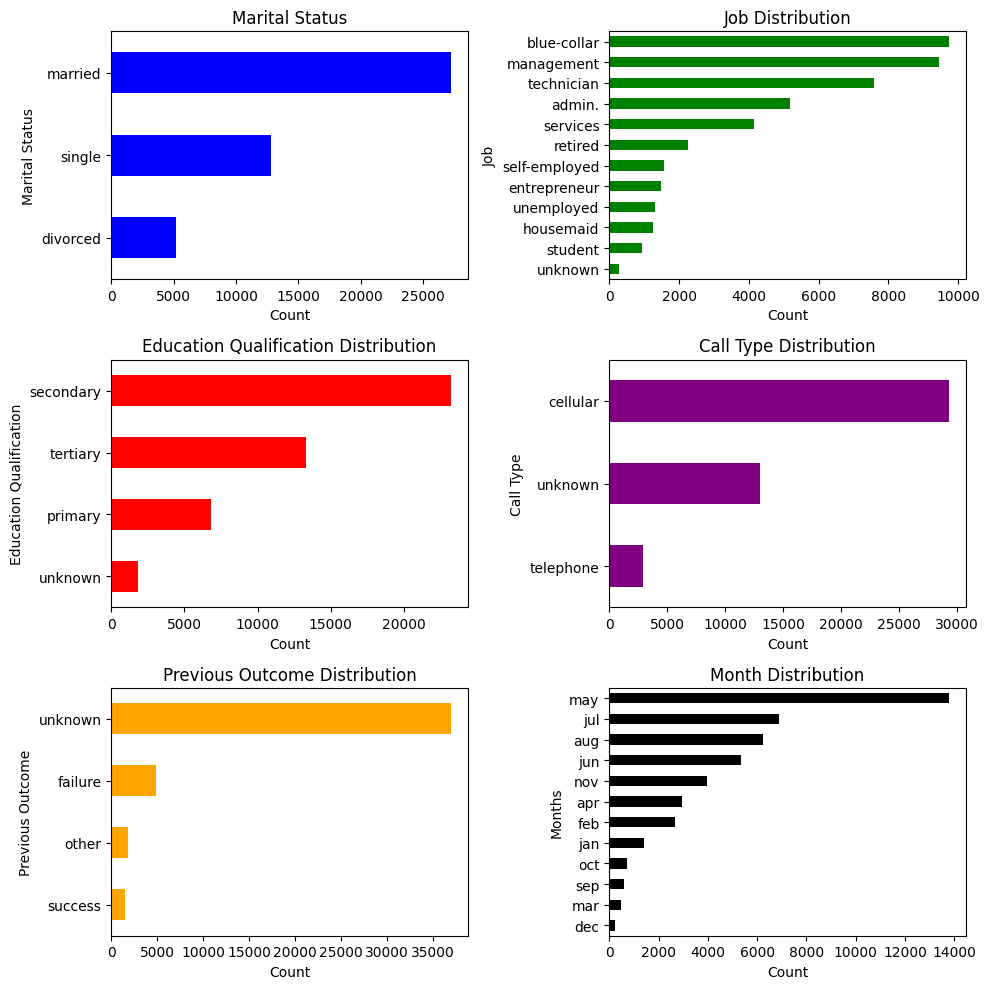

In [ ]:


# Set up the subplots - 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(10,10))

# Marital Status Count Plot
marital_counts = insurance['marital'].value_counts(ascending=True)
marital_counts.plot(kind='barh', color='blue', ax=axes[0, 0], title='Marital Status')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Marital Status')

# Job Count Plot
job_counts = insurance['job'].value_counts(ascending=True)
job_counts.plot(kind='barh', color='green', ax=axes[0, 1], title='Job Distribution')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Job')

# Education Qualification Count Plot
education_counts = insurance['education_qual'].value_counts(ascending=True)
education_counts.plot(kind='barh', color='red', ax=axes[1, 0], title='Education Qualification Distribution')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Education Qualification')

# Call Type Count Plot
call_type_counts = insurance['call_type'].value_counts(ascending=True)
call_type_counts.plot(kind='barh', color='purple', ax=axes[1, 1], title='Call Type Distribution')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Call Type')

# Previous Outcome Count Plot
prev_outcome_counts = insurance['prev_outcome'].value_counts(ascending=True)
prev_outcome_counts.plot(kind='barh', color='orange', ax=axes[2, 0], title='Previous Outcome Distribution')
axes[2, 0].set_xlabel('Count')
axes[2, 0].set_ylabel('Previous Outcome')

# month
mon_counts = insurance['mon'].value_counts(ascending=True)
mon_counts.plot(kind='barh', color='black', ax=axes[2, 1], title='Month Distribution')
axes[2, 1].set_xlabel('Count')
axes[2, 1].set_ylabel('Months')

# Adjust layout
plt.tight_layout()




# Save the plot to the specified directory
images_dir = '/content/drive/MyDrive/assignments/da'  # Update this to your desired path
plt.savefig(f"{images_dir}/categorical_freq.png",dpi=300)

plt.show()


#downloading img
#from google.colab import files
#files.download("1.png")


#choose directory
#images_dir = '/content/drive/MyDrive/assignments'
#plt.savefig(f"{images_dir}/1.png")


The dataset shows that most customers have secondary education, are married, and are often reached via cellular calls, particularly in May. However, the low conversion rate and high number of "unknown" outcomes suggest potential areas for improvement in customer engagement and data tracking.

In [ ]:
numerical_features = insurance.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix=insurance[numerical_features].corr()
correlation_matrix

,age,day,dur,num_calls
age,1.000000,-0.009175,-0.004698,0.004751
day,-0.009175,1.000000,-0.030246,0.162515
dur,-0.004698,-0.030246,1.000000,-0.084582
num_calls,0.004751,0.162515,-0.084582,1.000000



Most correlations are very close to zero, indicating weak relationships between the variables.
For example, the correlation between age and day is -0.009175, suggesting no significant linear relationship.

The correlation between day and num_calls is 0.162515, which is still weak but the strongest among the pairs. This suggests a slight positive relationship.

dur and num_calls have a correlation of -0.084582, indicating a weak negative relationship.
Statistical Analysis
Mean: The average correlation for each variable is around 0.22 to 0.28, indicating that overall correlations are weak.
Median: The median values are close to zero, reinforcing the observation of weak correlations.
Standard Deviation: Ranges from 0.48 to 0.52, showing some variability in the correlations.
Conclusion
The data suggests that there are no strong linear relationships between these variables. The slight positive correlation between day and num_calls might warrant further investigation, but overall, the correlations are weak.

The weak correlations suggest that the numerical features in this dataset are largely independent of each other. This might imply that when developing predictive models, these features could provide unique information without much redundancy. However, the lack of strong correlations also indicates that combining these features may not necessarily lead to improved predictive power without considering additional variables or interactions.

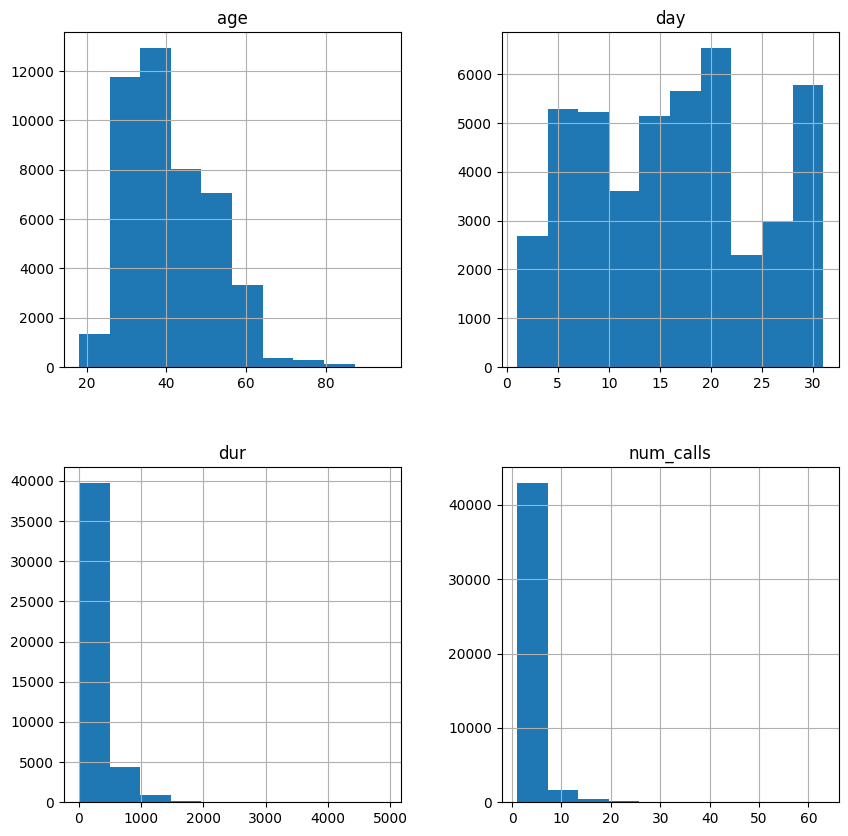

In [ ]:
insurance.hist(figsize=(10,10))

# Save the plot to the specified directory
images_dir = '/content/drive/MyDrive/assignments/da'  # Update this to your desired path
plt.savefig(f"{images_dir}/num_hist.png")


plt.show()


In [ ]:
insurance.isnull().sum()

,0
age,0
job,0
marital,0
education_qual,0
call_type,0
day,0
mon,0
dur,0
num_calls,0
prev_outcome,0


**1.2 Handling Missing Values and Outliers**

In [ ]:
# Checking for missing values in the dataset and not have
#missing_values = insurance.isnull().sum()

# Detecting outliers using the IQR method for numerical features
Q1 = insurance[numerical_features].quantile(0.25)
Q3 = insurance[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((insurance[numerical_features] < (Q1 - 1.5 * IQR)) | (insurance[numerical_features] > (Q3 + 1.5* IQR))).sum()

outliers


,0
age,487
day,0
dur,3235
num_calls,3064


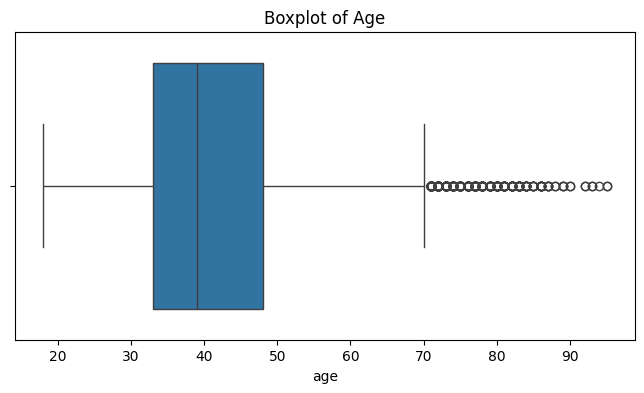

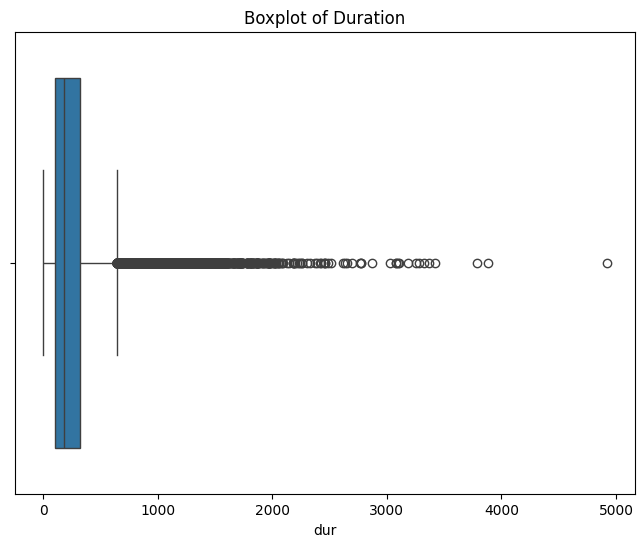

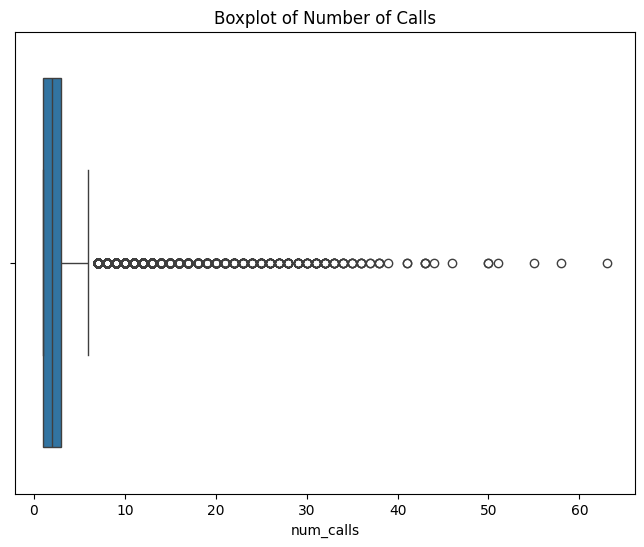

In [ ]:
# Boxplots for each numerical feature
import seaborn as sns

# Boxplot for Age
plt.figure(figsize=(8, 4))
sns.boxplot(x=insurance['age'])
plt.title('Boxplot of Age')
plt.show()

# Boxplot for Duration
plt.figure(figsize=(8, 6))
sns.boxplot(x=insurance['dur'])
plt.title('Boxplot of Duration')
plt.show()

# Boxplot for Number of Calls
plt.figure(figsize=(8, 6))
sns.boxplot(x=insurance['num_calls'])
plt.title('Boxplot of Number of Calls')
plt.show()


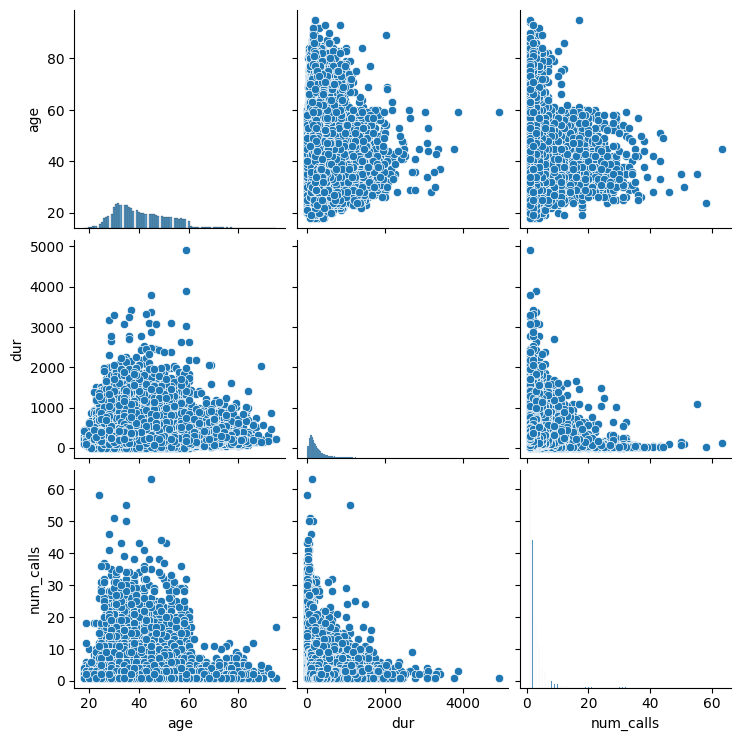

In [ ]:
# Pair plot for Age, Duration, and Number of Calls
sns.pairplot(insurance[['age', 'dur', 'num_calls']])
plt.show()

**1.2 Handling Missing Values and Outliers**
If your data is relatively straightforward, and the outliers are not too numerous, the IQR method is often sufficient. It’s a robust, easy-to-understand method that handles most cases well.

 For many datasets, including ones like this with numerical features such as age, duration, and number of calls, the IQR method is often a good balance between simplicity and effectiveness.

 other methods: Z-Score, percentile capping

 zscore: If your data is normally distributed or close to it, the Z-score method can be very effective. It considers how many standard deviations a point is from the mean.

 percentile capping: If you want to retain all data points but reduce the influence of extreme values, this method is useful. It is less aggressive than trimming since it keeps outliers but modifies them to be less extreme.

In [ ]:
# applying the IQR method

data_iqr_trimmed=insurance.copy()


Q1 = data_iqr_trimmed[numerical_features].quantile(0.25)
Q3 = data_iqr_trimmed[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_iqr_trimmed['age'] = data_iqr_trimmed['age'].clip(lower=lower_bound['age'], upper=upper_bound['age'])
data_iqr_trimmed['dur'] = data_iqr_trimmed['dur'].clip(lower=lower_bound['dur'], upper=upper_bound['dur'])
data_iqr_trimmed['num_calls'] = data_iqr_trimmed['num_calls'].clip(lower=lower_bound['num_calls'], upper=upper_bound['num_calls'])

data_iqr_trimmed.describe().T


,count,mean,std,min,25%,50%,75%,max
age,45205.0,40.869052,10.395247,18.0,33.0,39.0,48.0,70.5
day,45205.0,15.806880,8.322340,1.0,8.0,16.0,21.0,31.0
dur,45205.0,234.956200,176.754760,0.0,103.0,180.0,319.0,643.0
num_calls,45205.0,2.392235,1.600152,1.0,1.0,2.0,3.0,6.0


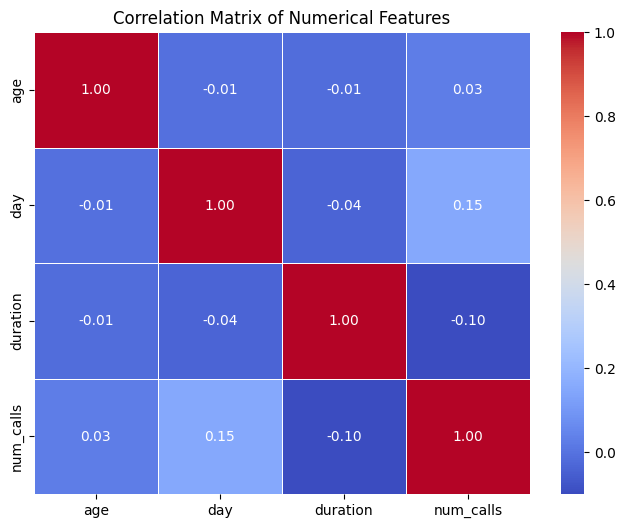

In [ ]:
data_iqr_trimmed = data_iqr_trimmed.rename(columns={'dur': 'duration'})
numerical_features = data_iqr_trimmed.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix=data_iqr_trimmed[numerical_features].corr()


# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')

# Save the plot to the specified directory
images_dir = '/content/drive/MyDrive/assignments/da'  # Update this to your desired path
plt.savefig(f"{images_dir}/corr.png",dpi=300)

plt.show()

In [ ]:
data_iqr_trimmed.head()

,age,job,marital,education_qual,call_type,day,mon,duration,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44.0,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33.0,unknown,single,unknown,unknown,5,may,198,1,unknown,no


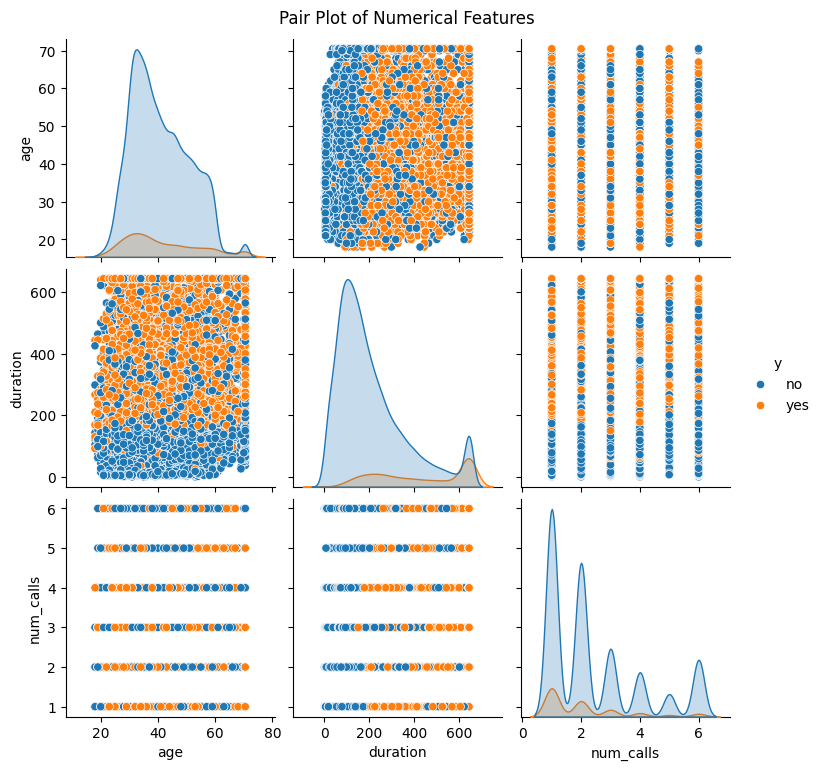

In [ ]:

pair_plot = sns.pairplot(data_iqr_trimmed, hue='y', vars=['age', 'duration', 'num_calls'])
pair_plot.fig.suptitle('Pair Plot of Numerical Features', y=1.02)  # Adjust y for better positioning


#images_dir = '/content/drive/MyDrive/assignments/da'
#pair_plot.savefig(f"{images_dir}/pair.png", dpi=300)

plt.show()

In [ ]:
data_iqr_trimmed.head()

,age,job,marital,education_qual,call_type,day,mon,duration,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44.0,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33.0,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
data_iqr_trimmed[['age', 'duration', 'num_calls']].corr()

,age,duration,num_calls
age,1.000000,-0.014351,0.025793
duration,-0.014351,1.000000,-0.100056
num_calls,0.025793,-0.100056,1.000000


In [ ]:
data_iqr_trimmed['duration'][data_iqr_trimmed['y'] == 'yes'].value_counts()


,count
duration,
643,1653
261,19
226,17
232,16
187,16
...,...
11,1
581,1
39,1


In [ ]:
insurance['dur'].value_counts()

,count
dur,
124,187
90,184
89,177
104,175
122,175
...,...
1833,1
1545,1
1352,1


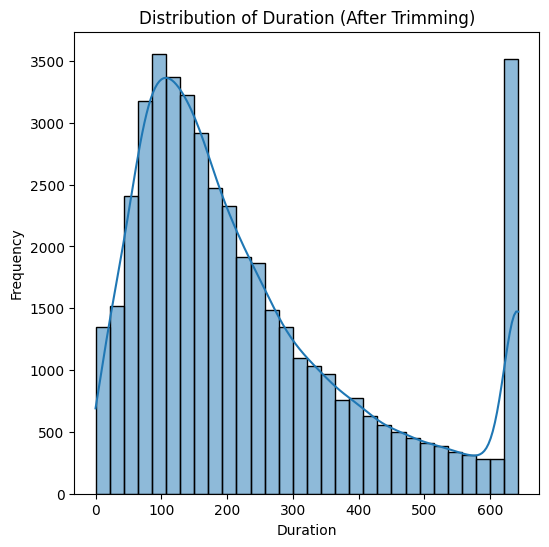

In [ ]:

# Histogram to analyze the distribution of age
plt.figure(figsize=(6, 6))
sns.histplot(data_iqr_trimmed['duration'], kde=True, bins=30)
plt.title('Distribution of Duration (After Trimming)')
plt.xlabel('Duration')
plt.ylabel('Frequency')

#images_dir = '/content/drive/MyDrive/assignments/da'
#plt.savefig(f"{images_dir}/hist_dur.png", dpi=300)

plt.show()



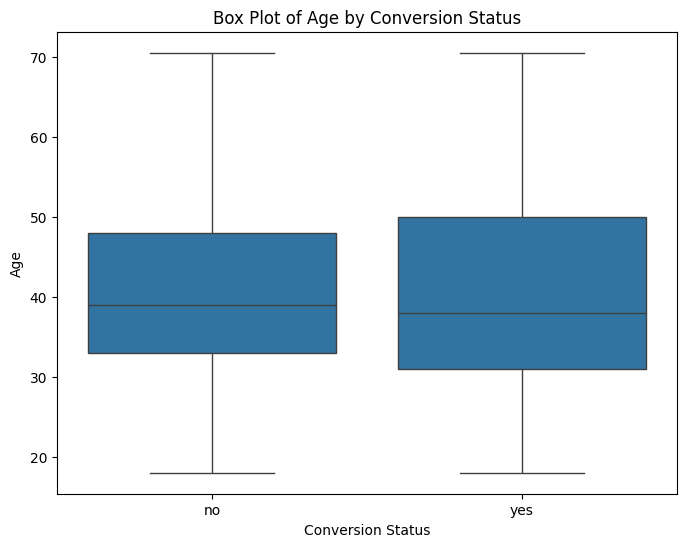

In [ ]:
# Box plot to analyze age distribution by conversion status
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_iqr_trimmed['y'], y=data_iqr_trimmed['age'])
plt.title('Box Plot of Age by Conversion Status')
plt.xlabel('Conversion Status')
plt.ylabel('Age')
plt.show()


In [ ]:
data_iqr_trimmed.tail()

,age,job,marital,education_qual,call_type,day,mon,duration,num_calls,prev_outcome,y
45206,51.0,technician,married,tertiary,cellular,17,nov,643,3,unknown,yes
45207,70.5,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,70.5,retired,married,secondary,cellular,17,nov,643,5,success,yes
45209,57.0,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37.0,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


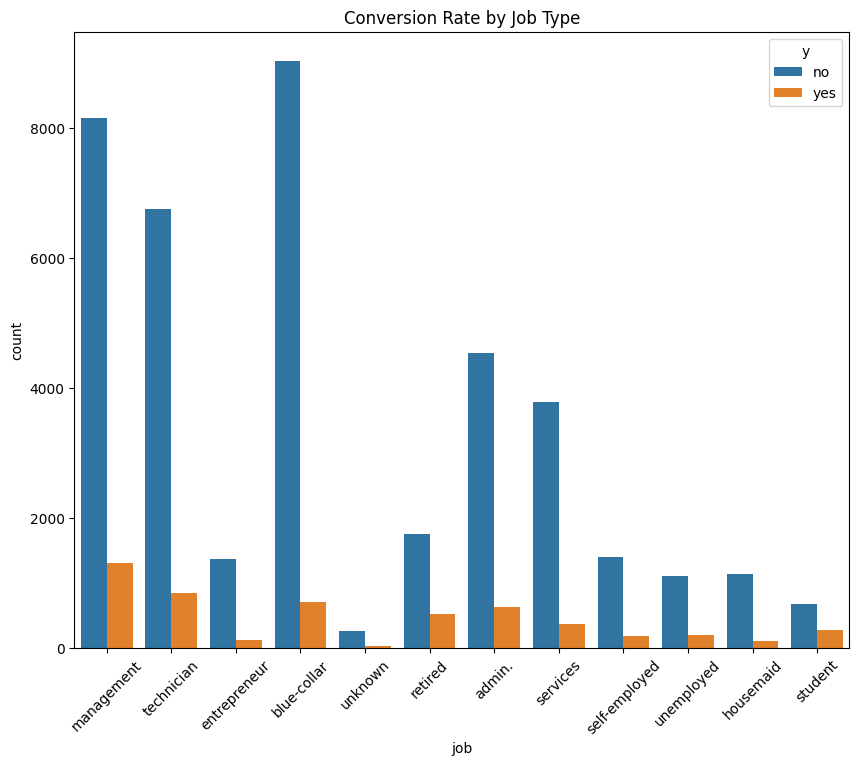

In [ ]:
#This code will visualize how conversion rates vary across different job types.

# Bar plot for job type and conversion
plt.figure(figsize=(10,8))
sns.countplot(x='job', hue='y', data=data_iqr_trimmed)
plt.title('Conversion Rate by Job Type')
plt.xticks(rotation=45)

images_dir = '/content/drive/MyDrive/assignments/da'
plt.savefig(f"{images_dir}/JOB_convrate.png", dpi=300)

plt.show()


<ipython-input-29-a3979dcbe6a5>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_by_age_segment = data_iqr_trimmed.groupby('age_segment')['y'].value_counts(normalize=True).unstack().fillna(0)


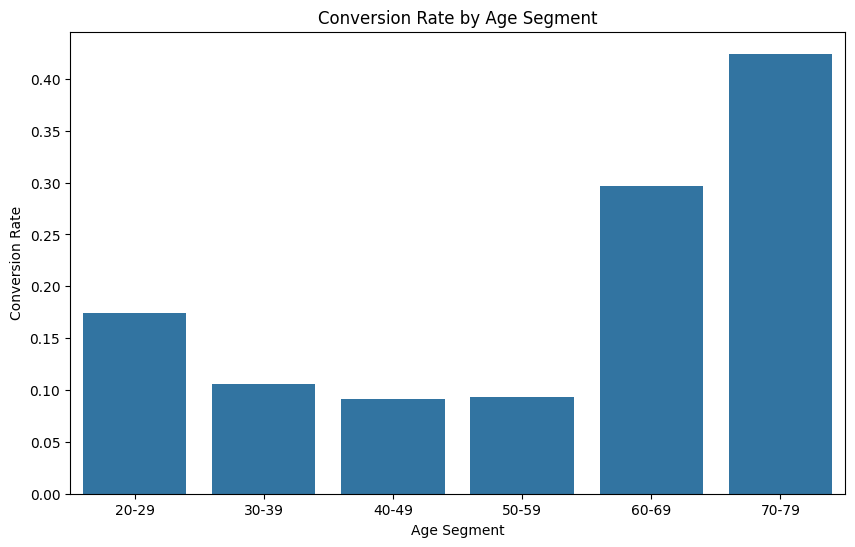

In [ ]:
# Define age segments
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data_iqr_trimmed['age_segment'] = pd.cut(data_iqr_trimmed['age'], bins=bins, labels=labels, right=False)

# Calculate conversion rate by age segment
conversion_by_age_segment = data_iqr_trimmed.groupby('age_segment')['y'].value_counts(normalize=True).unstack().fillna(0)
conversion_by_age_segment['conversion_rate'] = conversion_by_age_segment['yes'] / (conversion_by_age_segment['yes'] + conversion_by_age_segment['no'])

# Visualize conversion rate by age segment
plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_by_age_segment.index, y=conversion_by_age_segment['conversion_rate'])
plt.title('Conversion Rate by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Conversion Rate')


images_dir = '/content/drive/MyDrive/assignments/da'
plt.savefig(f"{images_dir}/age_convrate.png", dpi=300)

plt.show()


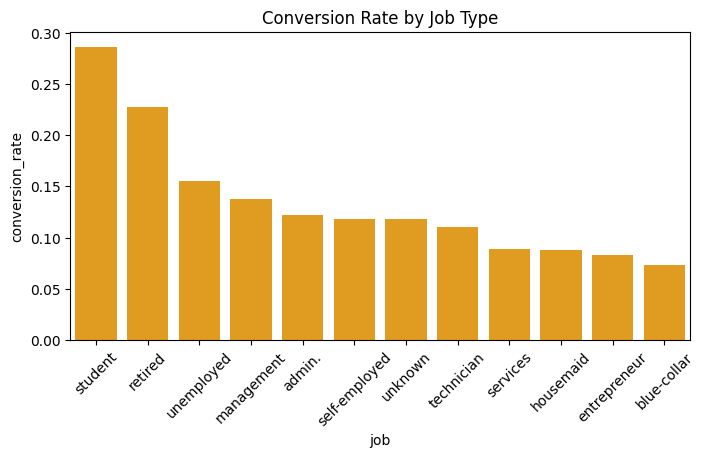

In [ ]:
job_counts=data_iqr_trimmed.groupby('job')['y'].value_counts(normalize=True).unstack()
job_counts['conversion_rate'] = job_counts['yes'] / (job_counts['yes'] + job_counts['no'])

# Sorting the job_counts DataFrame by conversion_rate in descending order
job_counts = job_counts.sort_values(by='conversion_rate', ascending=False)

# Bar plot for job type and conversion
plt.figure(figsize=(8, 4))
sns.barplot(x=job_counts.index, y=job_counts['conversion_rate'], color='orange')
plt.title('Conversion Rate by Job Type')
plt.xticks(rotation=45)

images_dir = '/content/drive/MyDrive/assignments/da'
plt.savefig(f"{images_dir}/JOB2_convrate.png", dpi=300)

plt.show()


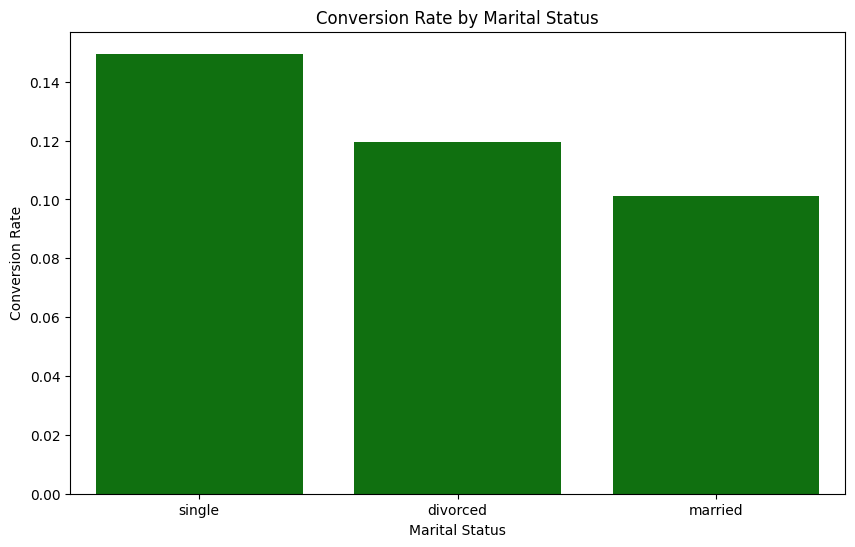

y         conversion_rate
marital                  
single           0.149515
divorced         0.119455
married          0.101250


In [ ]:
# Calculate conversion rate by marital status
marital_counts = data_iqr_trimmed.groupby('marital')['y'].value_counts(normalize=True).unstack()
marital_counts['conversion_rate'] = marital_counts['yes'] / (marital_counts['yes'] + marital_counts['no'])

# Sort by conversion rate
marital_counts = marital_counts.sort_values(by='conversion_rate', ascending=False)

# Bar plot for marital status and conversion rate
plt.figure(figsize=(10, 6))
sns.barplot(x=marital_counts.index, y=marital_counts['conversion_rate'], color='green')
plt.title('Conversion Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Conversion Rate')
plt.show()

# Display the conversion rates
print(marital_counts[['conversion_rate']])


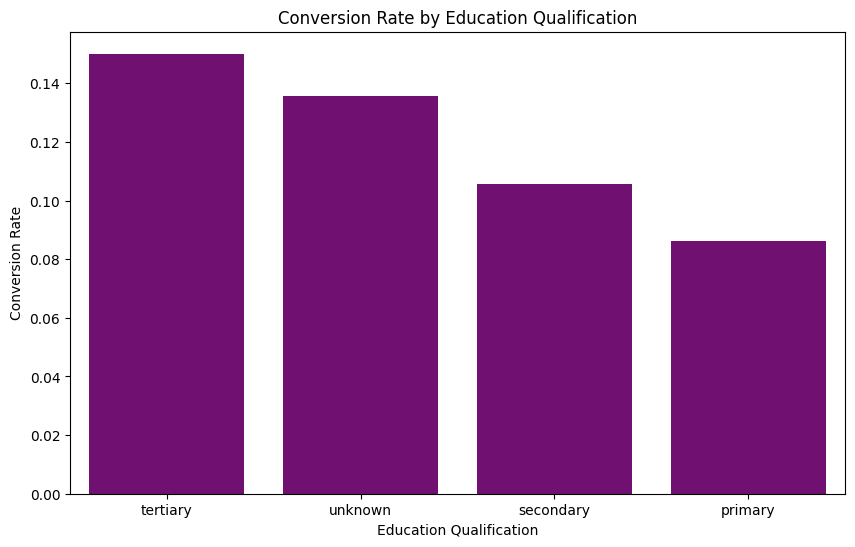

y               conversion_rate
education_qual                 
tertiary               0.150086
unknown                0.135703
secondary              0.105608
primary                0.086277


In [ ]:
# Calculate conversion rate by education qualification
education_counts = data_iqr_trimmed.groupby('education_qual')['y'].value_counts(normalize=True).unstack()
education_counts['conversion_rate'] = education_counts['yes'] / (education_counts['yes'] + education_counts['no'])

# Sort by conversion rate
education_counts = education_counts.sort_values(by='conversion_rate', ascending=False)

# Bar plot for education qualification and conversion rate
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts['conversion_rate'], color='purple')
plt.title('Conversion Rate by Education Qualification')
plt.xlabel('Education Qualification')
plt.ylabel('Conversion Rate')
plt.show()

# Display the conversion rates
print(education_counts[['conversion_rate']])


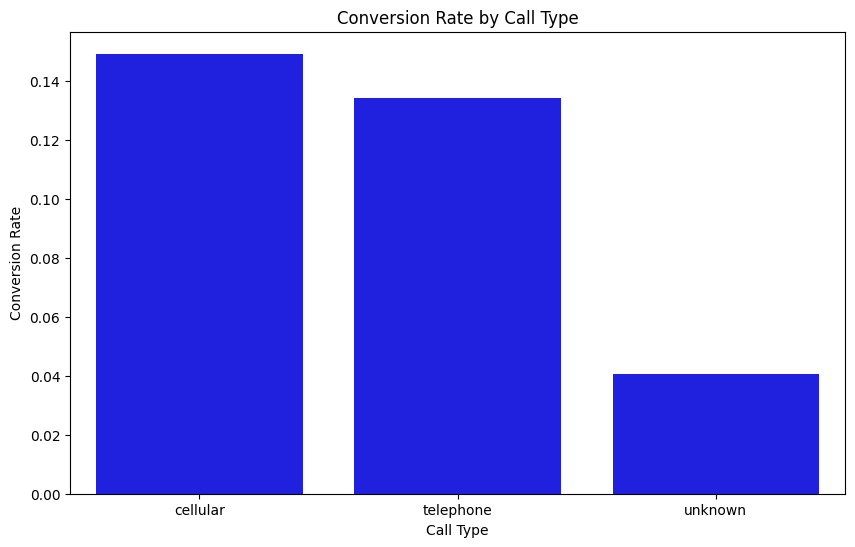

y          conversion_rate
call_type                 
cellular          0.149204
telephone         0.134205
unknown           0.040716


In [ ]:
# Calculate conversion rate by call type
call_type_counts = data_iqr_trimmed.groupby('call_type')['y'].value_counts(normalize=True).unstack()
call_type_counts['conversion_rate'] = call_type_counts['yes'] / (call_type_counts['yes'] + call_type_counts['no'])

# Sort by conversion rate
call_type_counts = call_type_counts.sort_values(by='conversion_rate', ascending=False)

# Bar plot for call type and conversion rate
plt.figure(figsize=(10, 6))
sns.barplot(x=call_type_counts.index, y=call_type_counts['conversion_rate'], color='blue')
plt.title('Conversion Rate by Call Type')
plt.xlabel('Call Type')
plt.ylabel('Conversion Rate')
plt.show()

# Display the conversion rates
print(call_type_counts[['conversion_rate']])


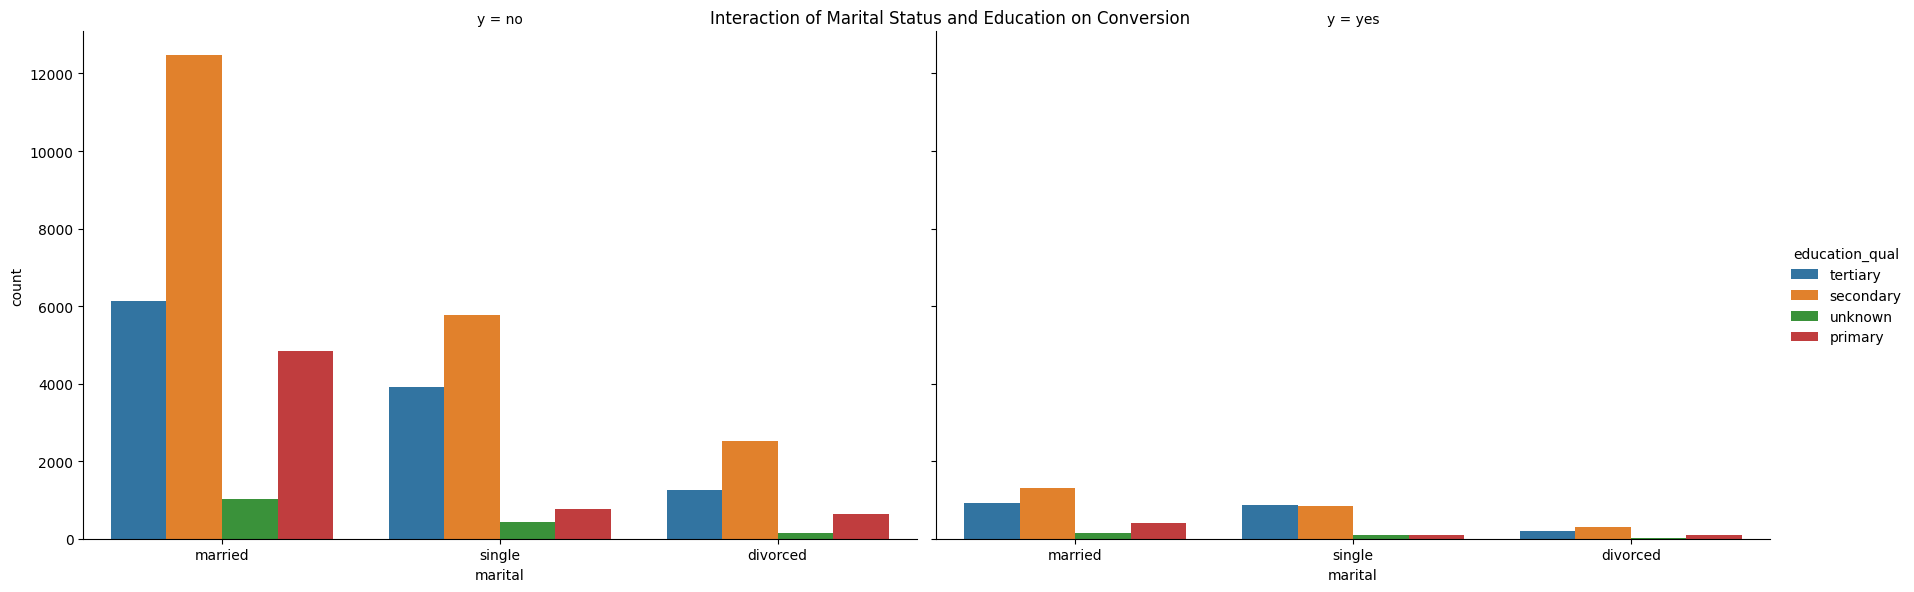

In [ ]:
sns.catplot(x='marital', hue='education_qual', col='y', data=data_iqr_trimmed, kind='count', height=6, aspect=1.5)
plt.suptitle('Interaction of Marital Status and Education on Conversion')
plt.show()


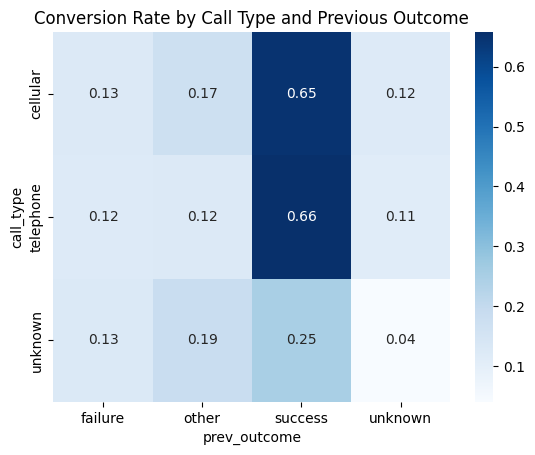

In [ ]:
call_prev_outcome_counts = data_iqr_trimmed.groupby(['call_type', 'prev_outcome'])['y'].value_counts(normalize=True).unstack()
call_prev_outcome_counts['conversion_rate'] = call_prev_outcome_counts['yes'] / (call_prev_outcome_counts['yes'] + call_prev_outcome_counts['no'])

sns.heatmap(call_prev_outcome_counts['conversion_rate'].unstack(), annot=True, cmap='Blues')
plt.title('Conversion Rate by Call Type and Previous Outcome')
plt.show()


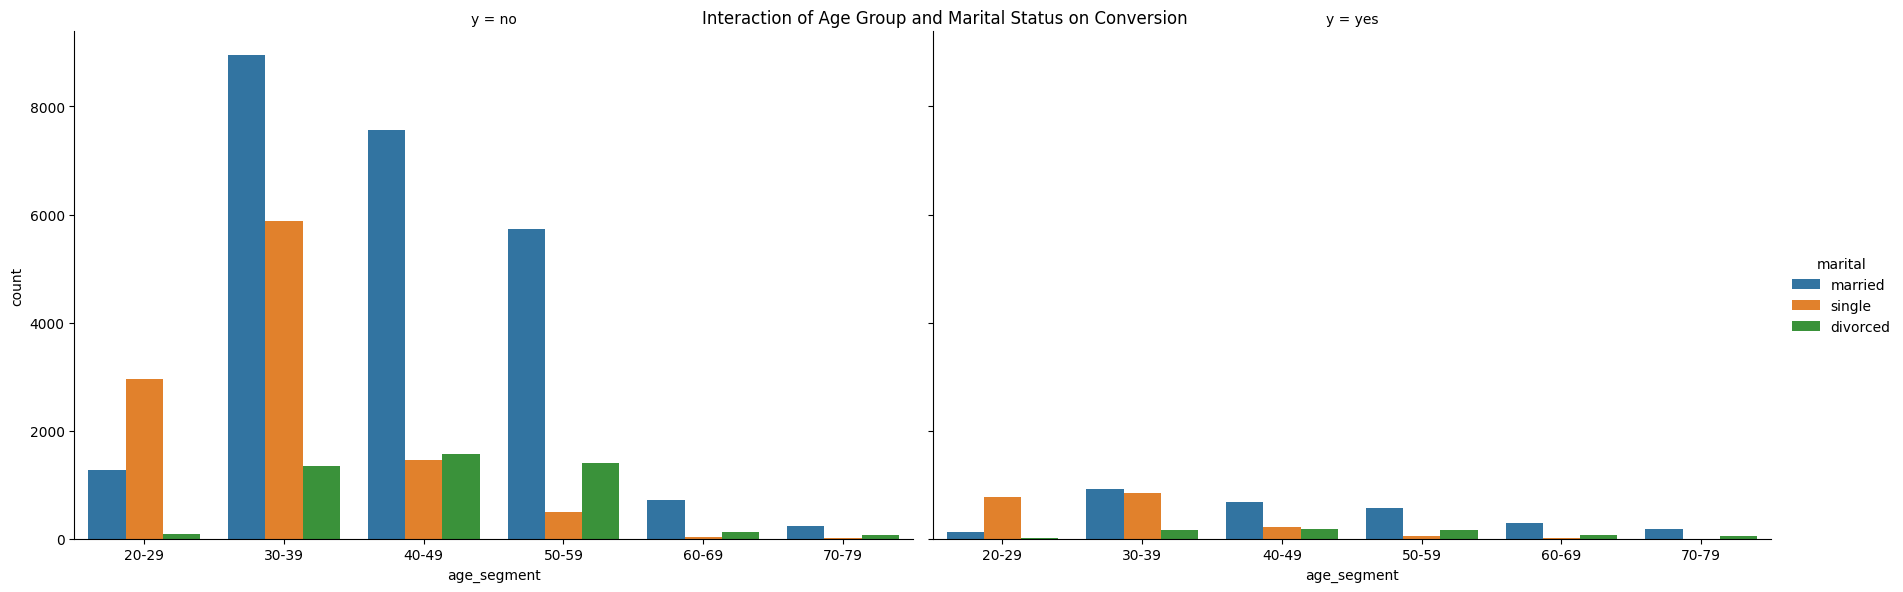

In [ ]:
sns.catplot(x='age_segment', hue='marital', col='y', data=data_iqr_trimmed, kind='count', height=6, aspect=1.5)
plt.suptitle('Interaction of Age Group and Marital Status on Conversion')
plt.show()


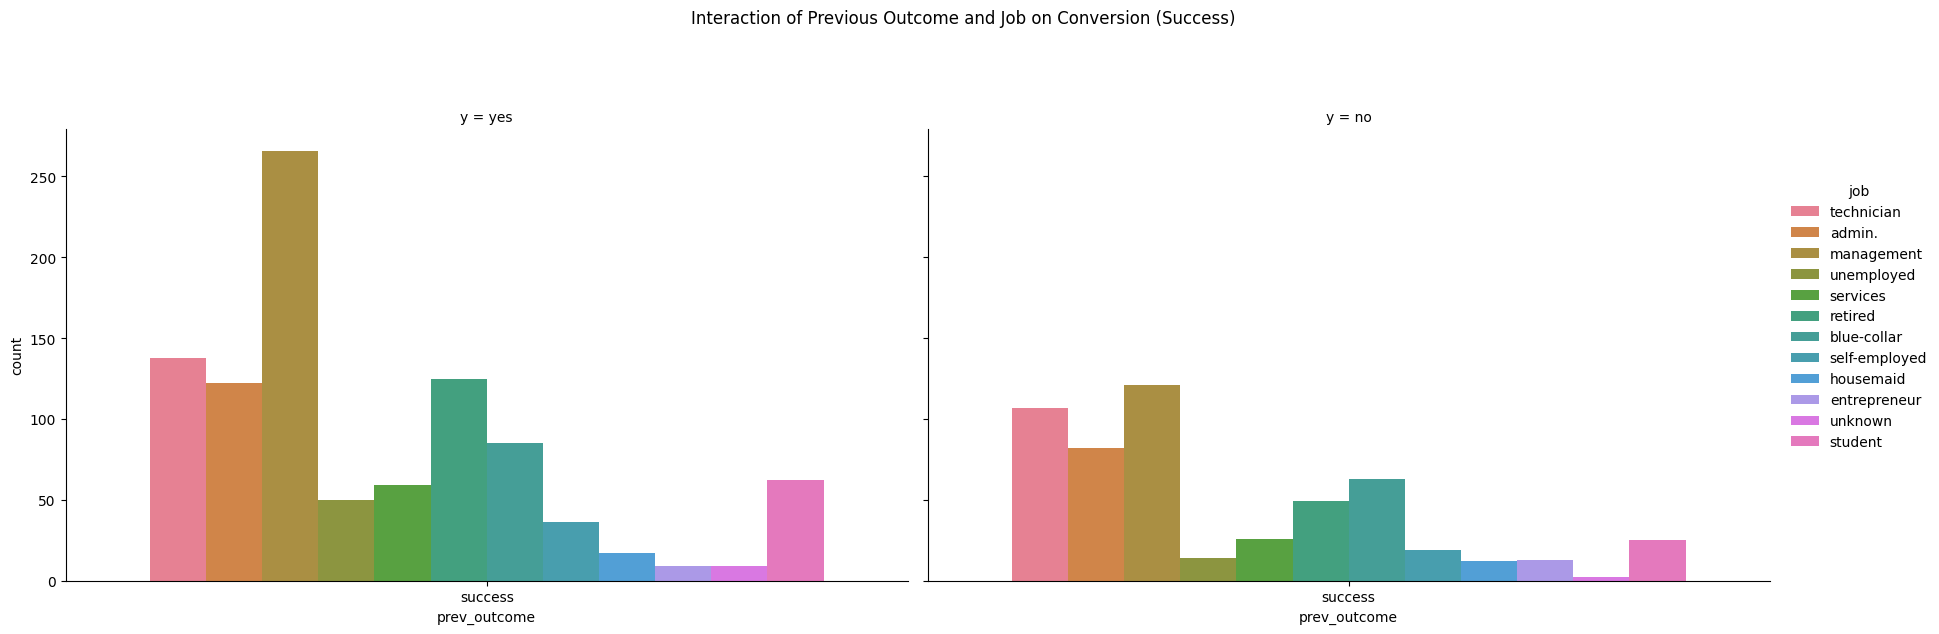

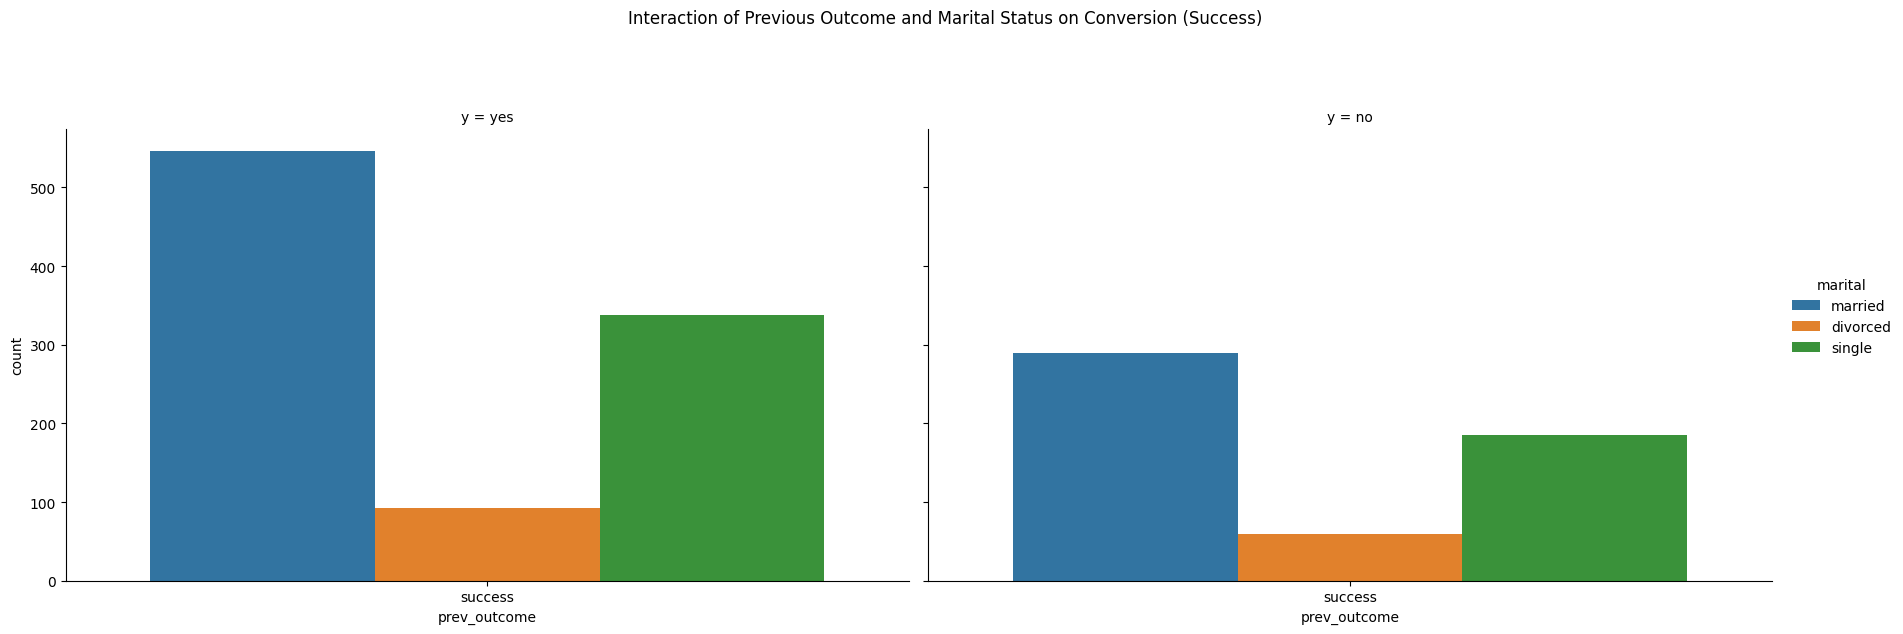

In [ ]:

# Filter prev_outcome success
filtered_data = data_iqr_trimmed[data_iqr_trimmed['prev_outcome'] == 'success']

# Interaction of Previous Outcome and Job on Conversion
sns.catplot(x='prev_outcome', hue='job', col='y', data=filtered_data, kind='count', height=6, aspect=1.5)
plt.subplots_adjust(top=0.85)
plt.suptitle('Interaction of Previous Outcome and Job on Conversion (Success)', y=1.05)
plt.show()

# Interaction of Previous Outcome and Marital Status on Conversion
sns.catplot(x='prev_outcome', hue='marital', col='y', data=filtered_data, kind='count', height=6, aspect=1.5)
plt.subplots_adjust(top=0.85)
plt.suptitle('Interaction of Previous Outcome and Marital Status on Conversion (Success)', y=1.05)
plt.show()



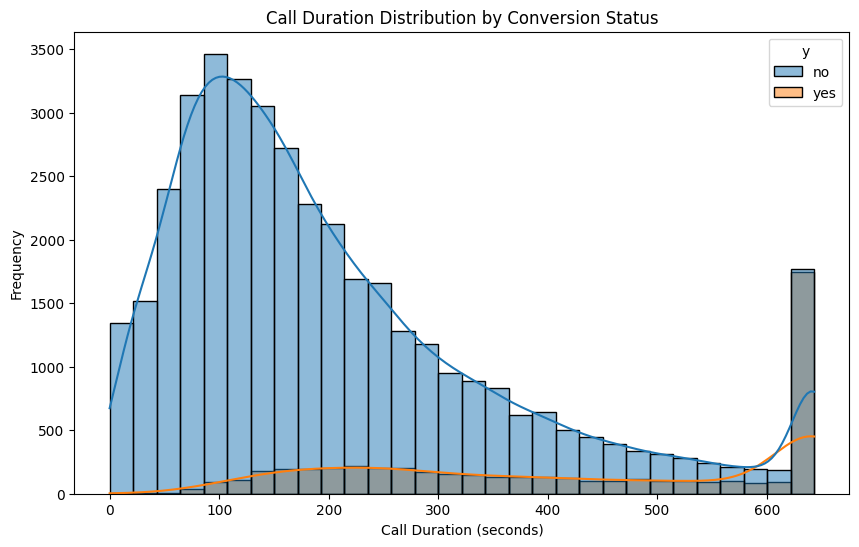

In [ ]:


# Histogram to analyze the distribution of call durations
plt.figure(figsize=(10, 6))
sns.histplot(data_iqr_trimmed, x='duration', hue='y', kde=True, bins=30)
plt.title('Call Duration Distribution by Conversion Status')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')

images_dir = '/content/drive/MyDrive/assignments/da'
plt.savefig(f"{images_dir}/hist_dur2.png", dpi=300)

plt.show()


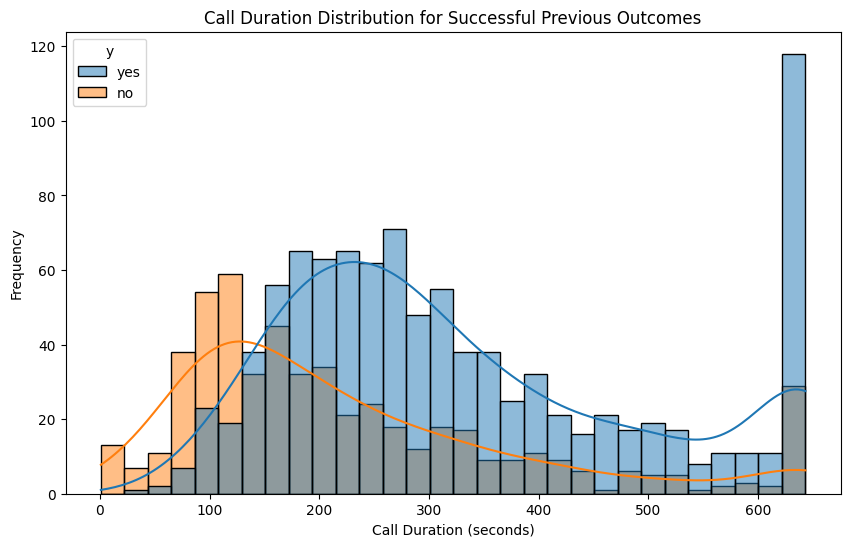

In [ ]:
# Filter the data for successful previous outcomes
success_data = data_iqr_trimmed[data_iqr_trimmed['prev_outcome'] == 'success']

# Histogram to analyze call duration specifically for successful previous outcomes
plt.figure(figsize=(10, 6))
sns.histplot(success_data, x='duration', hue='y', kde=True, bins=30)
plt.title('Call Duration Distribution for Successful Previous Outcomes')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


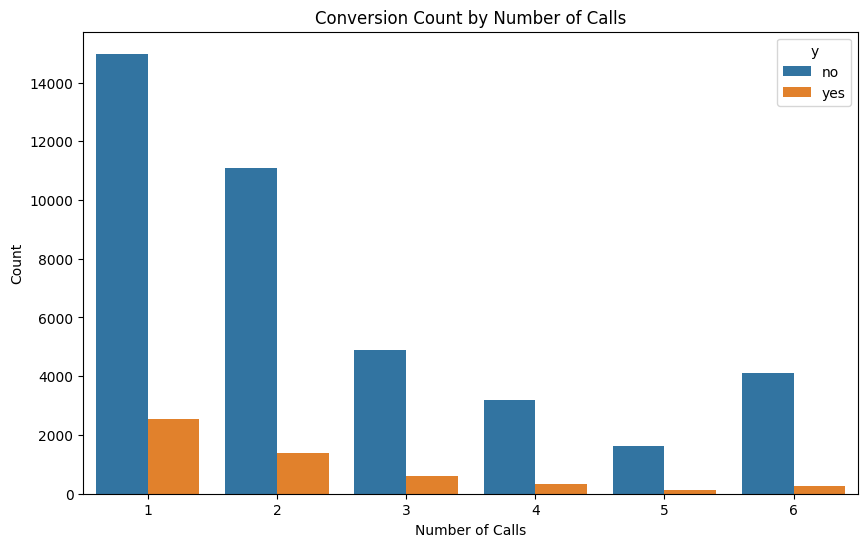

In [ ]:



# Countplot for overall conversion rate by number of calls
plt.figure(figsize=(10, 6))
sns.countplot(x='num_calls', hue='y', data=data_iqr_trimmed)
plt.title('Conversion Count by Number of Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Count')
plt.show()



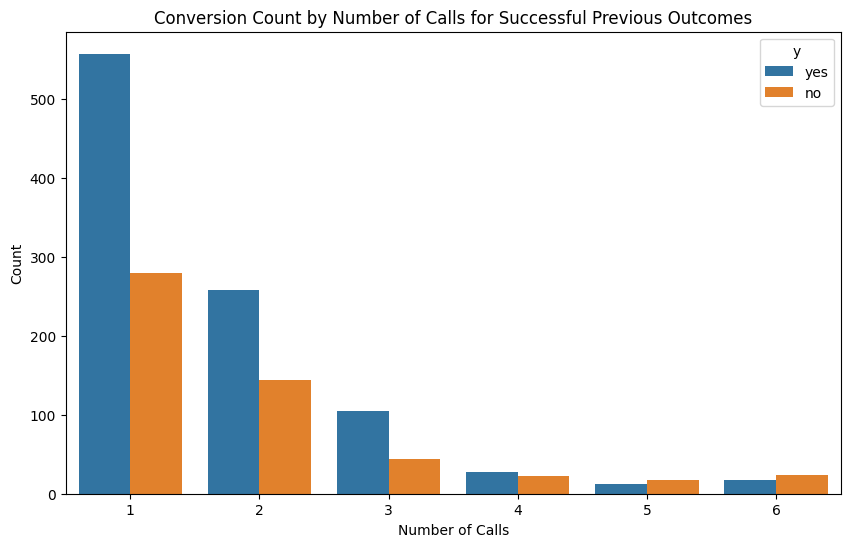

In [ ]:
# Filter the data for successful previous outcomes
success_data = data_iqr_trimmed[data_iqr_trimmed['prev_outcome'] == 'success']

# Countplot for conversion rate by number of calls for successful previous outcomes
plt.figure(figsize=(10, 6))
sns.countplot(x='num_calls', hue='y', data=success_data)
plt.title('Conversion Count by Number of Calls for Successful Previous Outcomes')
plt.xlabel('Number of Calls')
plt.ylabel('Count')
plt.show()


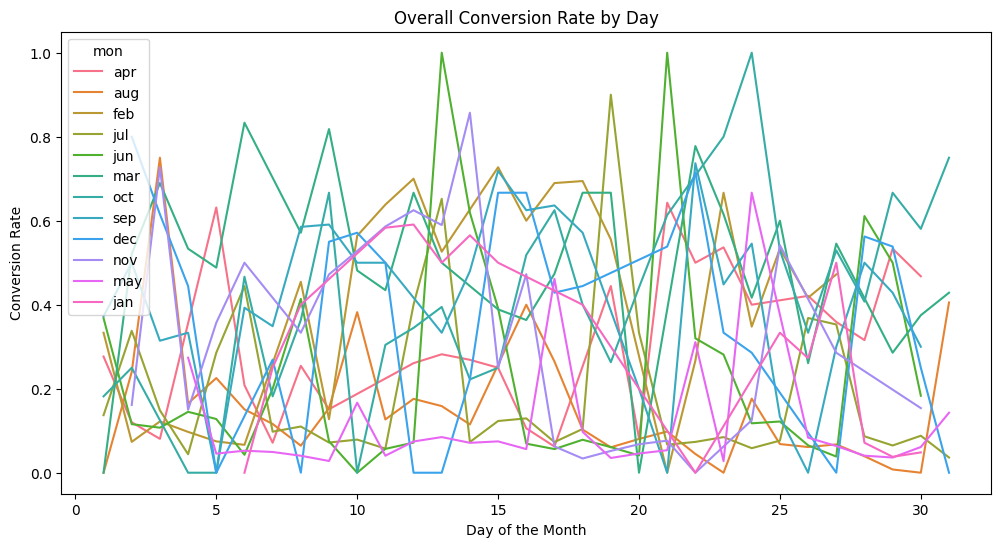

In [ ]:
# Calculate conversion rate by day and month
data_iqr_trimmed['conversion'] = data_iqr_trimmed['y'].map({'no': 0, 'yes': 1})
daily_conversion = data_iqr_trimmed.groupby(['day', 'mon'])['conversion'].mean().reset_index()

# Set the order for months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Plot the conversion rate by day with different lines for each month
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='conversion', hue='mon',
             data=daily_conversion)
plt.title('Overall Conversion Rate by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Conversion Rate')
plt.show()


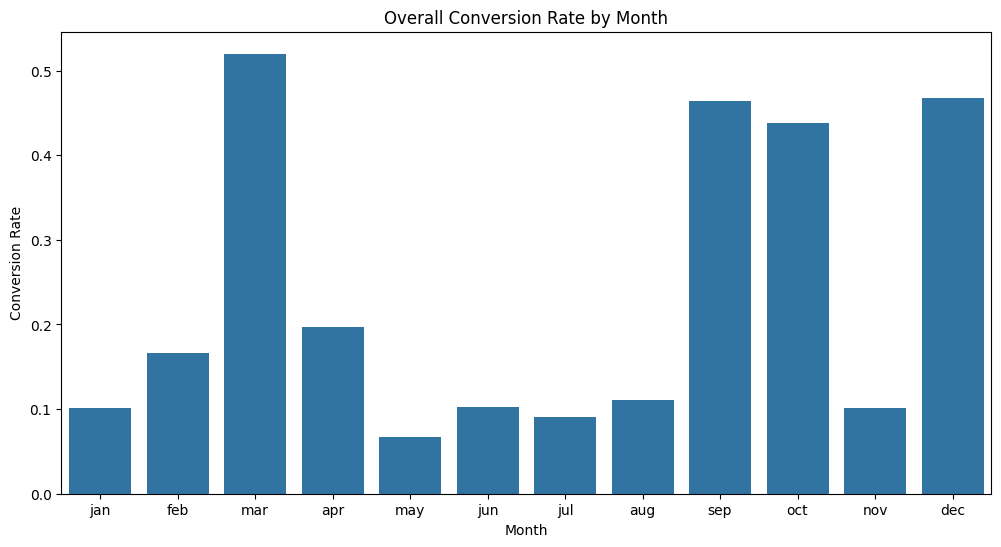

In [ ]:

# Calculate conversion rates for each month
monthly_conversion = data_iqr_trimmed.groupby('mon')['y'].apply(lambda x: (x == 'yes').mean()).reset_index()

# Set the order for months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Plot overall conversion rate by month
plt.figure(figsize=(12, 6))
sns.barplot(x='mon', y='y', data=monthly_conversion, order=month_order)
plt.title('Overall Conversion Rate by Month')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.show()




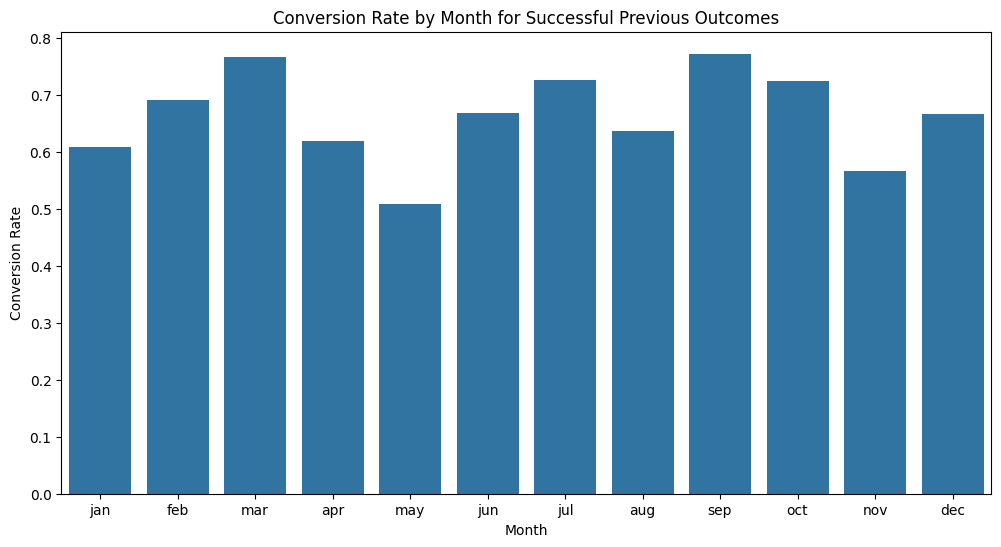

In [ ]:
# Filter the data for successful previous outcomes
success_data = data_iqr_trimmed[data_iqr_trimmed['prev_outcome'] == 'success']

# Calculate conversion rates for each month for successful previous outcomes
monthly_conversion_success = success_data.groupby('mon')['y'].apply(lambda x: (x == 'yes').mean()).reset_index()

# Plot conversion rate by month for successful previous outcomes
plt.figure(figsize=(12, 6))
sns.barplot(x='mon', y='y', data=monthly_conversion_success, order=month_order)
plt.title('Conversion Rate by Month for Successful Previous Outcomes')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.show()


In [ ]:
data_iqr_trimmed.head()

,age,job,marital,education_qual,call_type,day,mon,duration,num_calls,prev_outcome,y,age_segment,conversion
0,58.0,management,married,tertiary,unknown,5,may,261,1,unknown,no,50-59,0
1,44.0,technician,single,secondary,unknown,5,may,151,1,unknown,no,40-49,0
2,33.0,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,30-39,0
3,47.0,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,40-49,0
4,33.0,unknown,single,unknown,unknown,5,may,198,1,unknown,no,30-39,0


**Task 2: Model Selection and Training (LO1, LO3)**


**before modeling consider Label Encoding, One Hot Encoding**

 Label Encoding: For ordinal variables or in some tree-based models if the categories have a clear order.
Consider Target or Frequency Encoding: For high-cardinality features, but be cautious of potential overfitting.

One-Hot Encoding
Description: One-Hot Encoding creates binary columns for each category in a categorical variable. For example, if you have a column with categories ['red', 'green', 'blue'], One-Hot Encoding would create three binary columns: red, green, and blue.



One-Hot Encoding is generally the best choice for these variables, especially if you plan to use linear models, neural networks, or any model that assumes no inherent order in the categorical data.

DAY Cyclical Transformation


The day feature is cyclical (1-31), so representing it as a sine and cosine function can help the model better understand this cyclical pattern.





In [ ]:
data_iqr_trimmed.head()

,age,job,marital,education_qual,call_type,day,mon,duration,num_calls,prev_outcome,y,age_segment,conversion
0,58.0,management,married,tertiary,unknown,5,may,261,1,unknown,no,50-59,0
1,44.0,technician,single,secondary,unknown,5,may,151,1,unknown,no,40-49,0
2,33.0,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,30-39,0
3,47.0,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,40-49,0
4,33.0,unknown,single,unknown,unknown,5,may,198,1,unknown,no,30-39,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder



# data_iqr_trimmed is the DataFrame
# List of categorical variables to One-Hot Encode
categorical_vars = ['job', 'marital', 'education_qual', 'call_type','prev_outcome']

encoded_data = data_iqr_trimmed.iloc[:, :-2]

# Apply One-Hot Encoding using pandas get_dummies. for dummy variable trap used drop_first=true
encoded_data = pd.get_dummies(encoded_data, columns=categorical_vars, drop_first=True)

encoded_data['y']=encoded_data['y'].map({'no': 0, 'yes': 1})


# Display the first few rows of the encoded DataFrame
encoded_data.head()


,age,day,mon,duration,num_calls,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_married,marital_single,education_qual_secondary,education_qual_tertiary,education_qual_unknown,call_type_telephone,call_type_unknown,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58.0,5,may,261,1,0,False,False,False,True,...,True,False,False,True,False,False,True,False,False,True
1,44.0,5,may,151,1,0,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
2,33.0,5,may,76,1,0,False,True,False,False,...,True,False,True,False,False,False,True,False,False,True
3,47.0,5,may,92,1,0,True,False,False,False,...,True,False,False,False,True,False,True,False,False,True
4,33.0,5,may,198,1,0,False,False,False,False,...,False,True,False,False,True,False,True,False,False,True


In [ ]:


# Mapping month names to numbers
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Apply the mapping
encoded_data['mon_num'] = encoded_data['mon'].map(month_mapping)

# Cyclical encoding for 'month'
encoded_data['month_sin'] = np.sin(2 * np.pi * encoded_data['mon_num'] / 12)
encoded_data['month_cos'] = np.cos(2 * np.pi * encoded_data['mon_num'] / 12)

# Cyclical encoding for 'day'
encoded_data['day_sin'] = np.sin(2 * np.pi * encoded_data['day'] / 31)
encoded_data['day_cos'] = np.cos(2 * np.pi * encoded_data['day'] / 31)

# Optionally, drop the original 'mon' and 'mon_num' columns if no longer needed
encoded_data = encoded_data.drop(columns=['mon', 'mon_num','day'])

# Display the first few rows to check the results
encoded_data.head()


,age,duration,num_calls,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,education_qual_unknown,call_type_telephone,call_type_unknown,prev_outcome_other,prev_outcome_success,prev_outcome_unknown,month_sin,month_cos,day_sin,day_cos
0,58.0,261,1,0,False,False,False,True,False,False,...,False,False,True,False,False,True,0.5,-0.866025,0.848644,0.528964
1,44.0,151,1,0,False,False,False,False,False,False,...,False,False,True,False,False,True,0.5,-0.866025,0.848644,0.528964
2,33.0,76,1,0,False,True,False,False,False,False,...,False,False,True,False,False,True,0.5,-0.866025,0.848644,0.528964
3,47.0,92,1,0,True,False,False,False,False,False,...,True,False,True,False,False,True,0.5,-0.866025,0.848644,0.528964
4,33.0,198,1,0,False,False,False,False,False,False,...,True,False,True,False,False,True,0.5,-0.866025,0.848644,0.528964


In [ ]:
encoded_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 45205 entries, 0 to 45210
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       45205 non-null  float64
 1   duration                  45205 non-null  int64  
 2   num_calls                 45205 non-null  int64  
 3   y                         45205 non-null  int64  
 4   job_blue-collar           45205 non-null  bool   
 5   job_entrepreneur          45205 non-null  bool   
 6   job_housemaid             45205 non-null  bool   
 7   job_management            45205 non-null  bool   
 8   job_retired               45205 non-null  bool   
 9   job_self-employed         45205 non-null  bool   
 10  job_services              45205 non-null  bool   
 11  job_student               45205 non-null  bool   
 12  job_technician            45205 non-null  bool   
 13  job_unemployed            45205 non-null  bool   
 14  job_unknown

**RANDOM FOREST**

%30 test size

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

rf_data=encoded_data.copy()

# Step 1: Prepare the Data
X = rf_data.drop(columns=['y'])  # Features (drop target 'y')
y = rf_data['y']  # Target variable

# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

# Check the counts of target variable in the full dataset, training, and test sets
y_counts_full = y.value_counts()
y_counts_train = y_train.value_counts()
y_counts_test = y_test.value_counts()

# Display the counts before and after the split
y_counts_full, y_counts_train, y_counts_test




(y
 0    39916
 1     5289
 Name: count, dtype: int64,
 y
 0    27941
 1     3702
 Name: count, dtype: int64,
 y
 0    11975
 1     1587
 Name: count, dtype: int64)

In [ ]:


# Step 2: Train the Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 3: Evaluate the Model
y_pred = model.predict(X_test)

# Evaluation Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[11584   391]
 [  973   614]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11975
           1       0.61      0.39      0.47      1587

    accuracy                           0.90     13562
   macro avg       0.77      0.68      0.71     13562
weighted avg       0.89      0.90      0.89     13562


Accuracy Score:
0.8994248635894411



Feature Importance:
                     Feature  Importance
1                   duration    0.276745
0                        age    0.130070
26                   day_sin    0.093049
27                   day_cos    0.079252
22      prev_outcome_success    0.064675
24                 month_sin    0.062653
25                 month_cos    0.055256
2                  num_calls    0.049074
23      prev_outcome_unknown    0.019483
16  education_qual_secondary    0.015701
20         call_type_unknown    0.015615
14           marital_married    0.014212
11            job_technician    0.013725
6             job_management    0.012836
17   education_qual_tertiary    0.012417
15            marital_single    0.010871
3            job_blue-collar    0.010487
19       call_type_telephone    0.009080
9               job_services    0.007859
10               job_student    0.006371
18    education_qual_unknown    0.006311
7                job_retired    0.006284
21        prev_outcome_other    0.00

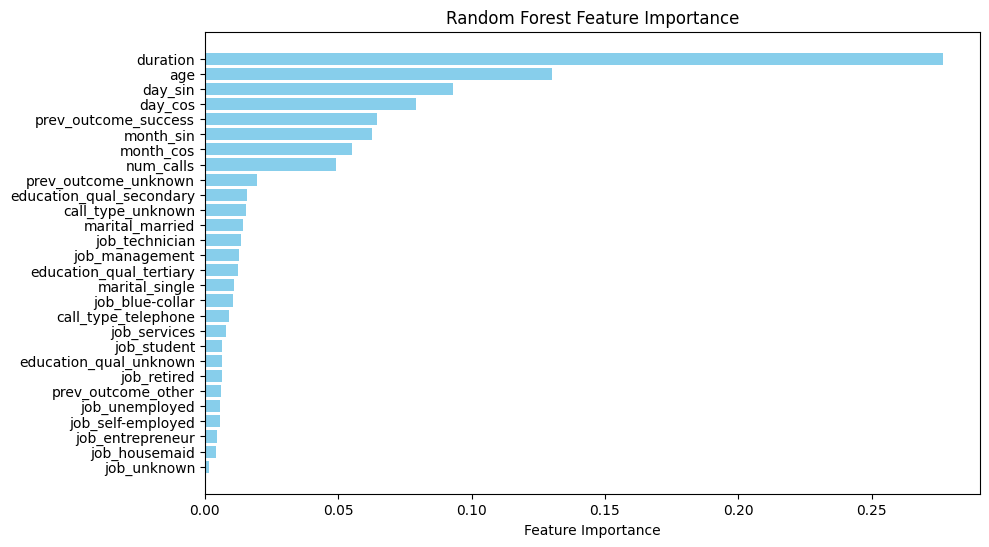

In [ ]:
#Perform Feature Importance Analysis
importances = model.feature_importances_

# Create a DataFrame for better visualization of feature importance
feature_names = X.columns  # Feature names from X
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display Feature Importance
print("\nFeature Importance:")
print(importance_df)

# Visualize Feature Importance using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

**Logistic regression**
%30 test size


In [ ]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression

# Assuming 'encoded_data' is your preprocessed DataFrame
logreg_data = encoded_data.copy()

# Step 2: Prepare the data
X = logreg_data.drop(columns=['y'])  # Features (drop target 'y')
y = logreg_data['y']  # Target variable

# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

# Step 4: Evaluate the Logistic Regression model
y_pred = logreg_model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[11610   340]
 [ 1082   530]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11950
           1       0.61      0.33      0.43      1612

    accuracy                           0.90     13562
   macro avg       0.76      0.65      0.68     13562
weighted avg       0.88      0.90      0.88     13562


Accuracy Score:
0.8951482082288748


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Step 5: Interpret the Logistic Regression Model

# Get the coefficients from the model
coefficients = logreg_model.coef_[0]  # Coefficients for each feature

# Create a DataFrame to show the feature importance (coefficients)
feature_names = X.columns  # Features used in the model
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients for importance
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the coefficients
print("\nLogistic Regression Coefficients:")
print(coef_df[['Feature', 'Coefficient']])



Logistic Regression Coefficients:
                     Feature  Coefficient
22      prev_outcome_success     2.553305
20         call_type_unknown    -1.122800
10               job_student     0.895095
17   education_qual_tertiary     0.532900
4           job_entrepreneur    -0.481970
3            job_blue-collar    -0.461368
8          job_self-employed    -0.412679
7                job_retired     0.381511
18    education_qual_unknown     0.340023
9               job_services    -0.336371
5              job_housemaid    -0.326107
15            marital_single     0.276373
11            job_technician    -0.239866
23      prev_outcome_unknown    -0.218710
16  education_qual_secondary     0.207068
6             job_management    -0.199481
21        prev_outcome_other     0.154716
12            job_unemployed    -0.134518
13               job_unknown    -0.126932
2                  num_calls    -0.114900
14           marital_married    -0.111478
25                 month_cos     0.095477

**Random forest- logistic regression**

%20 test size

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

model_data=encoded_data.copy()

# Define X and y (features and target variable)
X = model_data.drop(columns=['y'])  # Features
y = model_data['y']  # Target variable

# Scale the data (done once outside the loop)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
lr = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=42)
rf = RandomForestClassifier(class_weight='balanced',random_state=42)

# Reduced hyperparameter grids for faster tuning
param_grid_lr = {
    'C': [0.1, 1, 10],  # Narrowed C values
    'penalty': ['l2'],  # Keep penalty fixed
    'solver': ['lbfgs']  # Keep solver fixed
}

param_grid_rf = {
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [6, 8],  # Focus on important depth values
    'max_features': ['sqrt'],  # Keep this common value
    'criterion': ['gini']  # Keep criterion fixed
}

# Use RandomizedSearchCV to randomly sample 5 combinations for Logistic Regression and 10 for Random Forest
random_search_lr = RandomizedSearchCV(estimator=lr, param_distributions=param_grid_lr, n_iter=5, cv=3, scoring='accuracy', n_jobs=-1)
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform Randomized Search for Logistic Regression and Random Forest
print("Running Randomized Search for Logistic Regression...")
random_search_lr.fit(X_train, y_train)
best_lr = random_search_lr.best_estimator_

print("Running Randomized Search for Random Forest...")
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_

# Evaluate each optimized model on test data
models_optimized = {
    "Optimized Logistic Regression": best_lr,
    "Optimized Random Forest": best_rf
}

# Evaluate each optimized model on test data with additional metrics
for model_name, model in models_optimized.items():
    print(f"\nEvaluating {model_name} on test data...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Test Set Accuracy: {accuracy:.4f}")
    print(f"Test Set Recall: {recall:.4f}")
    print(f"Test Set F1-Score: {f1:.4f}")


Running Randomized Search for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Running Randomized Search for Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Evaluating Optimized Logistic Regression on test data...
Test Set Accuracy: 0.8114
Test Set Recall: 0.7799
Test Set F1-Score: 0.4984

Evaluating Optimized Random Forest on test data...
Test Set Accuracy: 0.8332
Test Set Recall: 0.8545
Test Set F1-Score: 0.5517
